Importing the Dependencies

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

Data Collection & Analysis

In [11]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('transformed_data/without_Positive_Correlating_Attributes.csv')

In [12]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

In [13]:
# number of rows and columns in the dataframe
parkinsons_data.shape

In [14]:
# getting more information about the dataset
parkinsons_data.info()

In [15]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

In [16]:
# getting some statistical measures about the data
parkinsons_data.describe()

In [17]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1  --> Parkinson's Positive

0 --> Healthy


In [18]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

Data Pre-Processing

Separating the features & Target

In [19]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']
# ----------------------------------#

In [20]:
print(X)

In [21]:
print(Y)

Splitting the data to training data & Test data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

Data Standardization

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

In [26]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
print(X_train)
#--------------------------------------#

Model Training

Support Vector Machine Model

In [83]:
model = svm.SVC(kernel='linear')

In [84]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')





Model Evaluation

Accuracy Score

In [85]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [86]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8974358974358975


In [87]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [88]:
print('Accuracy score of test data : ', test_data_accuracy)
#--------------------------------------------------

Accuracy score of test data :  0.8717948717948718


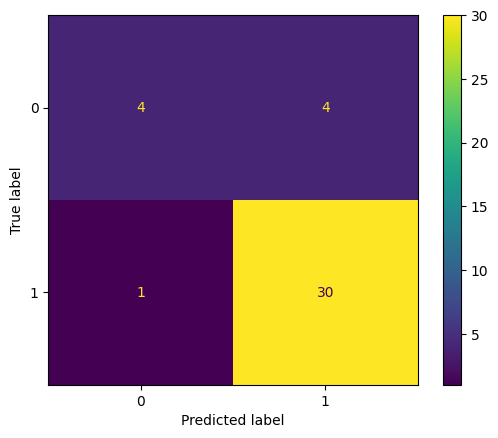

In [89]:
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.show()

Saving the model using pickle

In [34]:
import pickle
with open('model_svm.pkl','wb') as file:
    pickle.dump(model,file)

Loading model using pickle

In [35]:
import pickle
with open('model_svm.pkl','rb') as file:
    model_svm = pickle.load(file)

Building a Predictive System

In [36]:
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model_svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


In [37]:
len(input_data)

In [38]:
input_data_as_numpy_array.shape

In [39]:
input_data_reshaped.shape

# Trying logistic classifier

In [80]:
parkinsons_sys = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [81]:
X_test_prediction = parkinsons_sys.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.8205128205128205


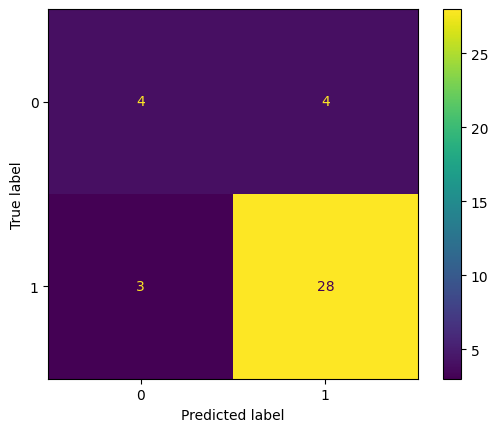

In [82]:
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(parkinsons_sys, X_test, Y_test)
plt.show()

# Trying kmeans

In [42]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_train, Y_train)

In [43]:
X_test_prediction = kmeans.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

# Logistics after PCA

In [44]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(X_train)
X_test_PCA=pca.transform(X_test)
print(X_train.shape)
print(X_PCA.shape)
print(X_test_PCA.shape)

In [45]:
parkinsons_sys_pca = LogisticRegression(random_state=0).fit(X_PCA, Y_train)

In [46]:
X_test_prediction = parkinsons_sys_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

# SVM after PCA

In [47]:
svm_pca_model = svm.SVC(kernel='linear')
svm_pca_model.fit(X_PCA, Y_train)

In [48]:
X_test_prediction = svm_pca_model.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

# kmeans after PCA

In [49]:
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_PCA, Y_train)

In [50]:
X_test_prediction = kmeans_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

In [51]:
print(pca.components_)

## Implementing Random Forest

In [75]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=10)

In [76]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy) 

0.9230769230769231


In [77]:
avg = 0
for i in range(10):
    classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
    classifier.fit(X_train, Y_train)
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#     print (test_data_accuracy) 
    avg+=test_data_accuracy
print(avg/10)

0.9102564102564104


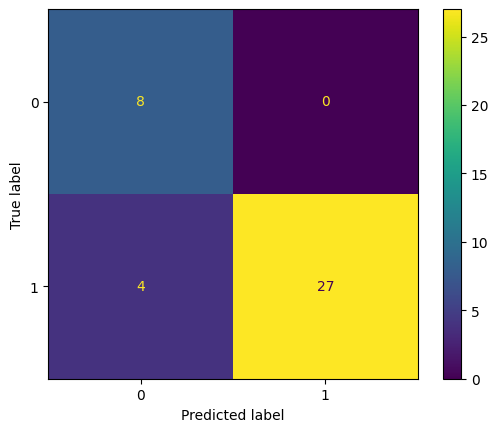

In [78]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)
plt.show()


In [56]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(precision)

In [57]:
recall= cm[1][1] / (cm[1][1] + cm[1][0])
print(recall)

Random Forest with PCA

In [58]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_PCA, Y_train)
X_test_prediction = classifier.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Fitting Decision Tree Model on Data
decision_parkinson_classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [71]:
# Predicting Values on Test Set
Y_predicted = decision_parkinson_classifier.predict(X_test)

In [72]:
decision_accuracy = accuracy_score(Y_test, Y_predicted)
print(decision_accuracy)

0.8974358974358975


In [73]:
confusion_matrix(Y_test,Y_predicted)

array([[ 7,  1],
       [ 3, 28]], dtype=int64)

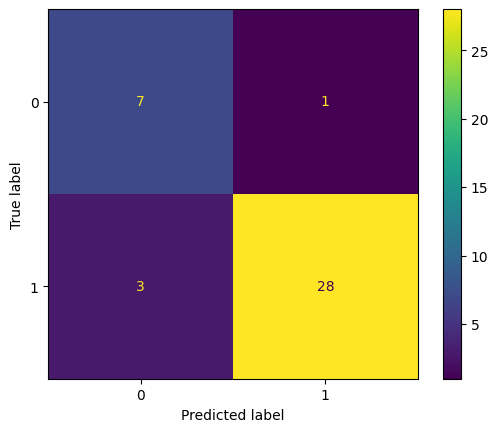

In [79]:
# cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(decision_parkinson_classifier, X_test, Y_test)
plt.show()

# Decision Tree after PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_parkinson_classifier_PCA = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier_PCA.fit(X_PCA, Y_train)

In [ ]:
Y_predicted_PCA = decision_parkinson_classifier_PCA.predict(X_test_PCA)

In [ ]:
decision_accuracy_PCA = accuracy_score(Y_test, Y_predicted_PCA)
print(decision_accuracy_PCA)